Link to Medium blog post: https://towardsdatascience.com/renaming-columns-in-a-pandas-dataframe-1d909360ddc6

In [4]:
import pandas as pd

In [25]:
def load_data(): 
    df_all = pd.read_csv('train.csv')
    # Take a subset
    return df_all.loc[:, ['PassengerId', 'Pclass', 'Name', 'Sex']]
df = load_data()

df

,PassengerId,Pclass,Name,Sex
0,1,3,"Braund, Mr. Owen Harris",male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,3,"Heikkinen, Miss. Laina",female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,3,"Allen, Mr. William Henry",male
...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male
887,888,1,"Graham, Miss. Margaret Edith",female
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,890,1,"Behr, Mr. Karl Howell",male


## 1. Passing a list of names to columns attribute

Pandas DataFrame provides a columns attribute for us to access the column names. The column name can also be renamed by directly passing a list of new names to the columns attribute.

In [11]:
# Access column names
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex'], dtype='object')

In [13]:
# Rename PassengerId to Id, Pclass to Class
df.columns = ['Id', 'Class', 'Name', 'Sex']
df.columns

Index(['Id', 'Class', 'Name', 'Sex'], dtype='object')

However, a disadvantage with this approach is that we need to provide names for all columns even if we want to rename only some of them. Otherwise, we will get a “ValueError: Length mismatch”:

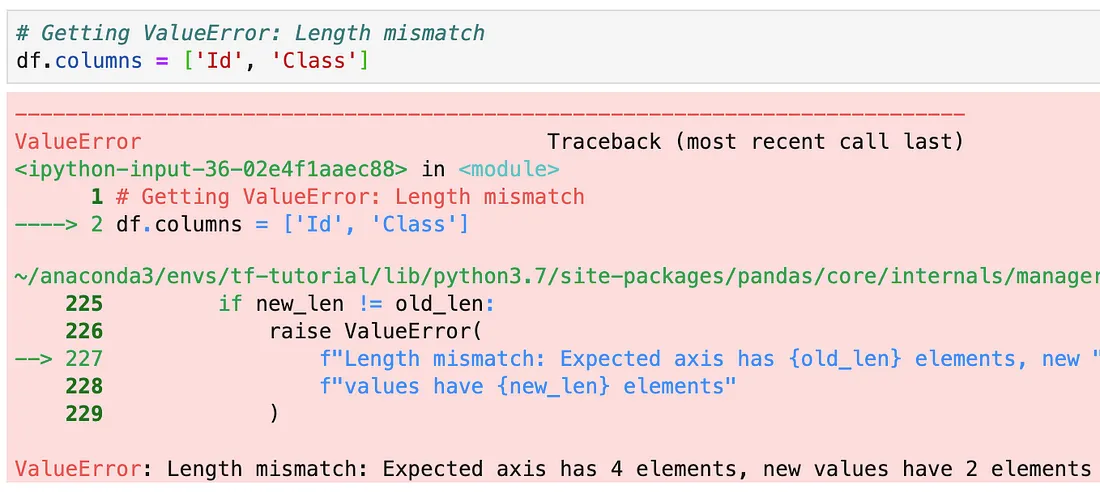

## 2. Using rename() function

Pandas has a built-in function called rename() to change the column names. It’s useful when you want to rename some selected columns.

### 2.1 Rename columns using a dictionary mapping

To rename columns, we can pass a dictionary to the columns argument. The keys are the columns you want to change and the values are the new names for these columns. We can also set the argument inplace to True for the change to happen in the existing DataFrame.

In [14]:
# Rename columns
#   PassengerId  ->  Id
#   Pclass       ->  Class
df.rename(
    columns=({ 'PassengerId': 'Id', 'Pclass': 'Class'}), 
    inplace=True,
)
df.head()


,Id,Class,Name,Sex
0,1,3,"Braund, Mr. Owen Harris",male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,3,"Heikkinen, Miss. Laina",female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,3,"Allen, Mr. William Henry",male


### 2.2 Rename columns using a function

Instead of a dictionary mapping, we can also pass a function to the columns argument. For example, to convert column names into lowercase, we can pass a str.lower function:

In [15]:
df.rename(columns=str.lower).head()

,id,class,name,sex
0,1,3,"Braund, Mr. Owen Harris",male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,3,"Heikkinen, Miss. Laina",female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,3,"Allen, Mr. William Henry",male


We can also create a custom function and pass it to the columns argument.

In [16]:
def toUpperCase(string):
    return string.upper()
df.rename(columns=toUpperCase).head()

,ID,CLASS,NAME,SEX
0,1,3,"Braund, Mr. Owen Harris",male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,3,"Heikkinen, Miss. Laina",female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,3,"Allen, Mr. William Henry",male


We can also use lambda expression:

In [17]:
df.rename(columns=lambda s: s.upper()).head()

,ID,CLASS,NAME,SEX
0,1,3,"Braund, Mr. Owen Harris",male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,3,"Heikkinen, Miss. Laina",female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,3,"Allen, Mr. William Henry",male


This is useful when you need to update many columns or all columns with the same naming convention.

### 2.3 Rename index

Turns out rename() can be used to rename index as well. Let’s first create a DataFrame:

In [18]:
df = pd.DataFrame(
    { "ID": [1, 2], "City": ['London', 'Oxford']}, 
    index=['A1', 'A2'],
)

We can use dictionary mapping to rename index:

In [19]:
df.rename({ 'A1': 'B1', 'A2': 'B2' })


,ID,City
B1,1,London
B2,2,Oxford


We can also pass a function and set the axis argument to 0 or 'index'

In [20]:
df.rename(str.lower, axis=0)

,ID,City
a1,1,London
a2,2,Oxford


## 3. Using read_csv() with names argument

We can actually rename the columns while reading a CSV file. Here is what we can do to override the column names:

In [22]:
new_names = ['ID', 'Survived', 'Class', 'Name', 'Sex']
df = pd.read_csv(
    'train.csv', 
    names=new_names,           # Rename columns
    header=0,                  # Drop the existing header row
    usecols=[0,1,2,3,4],       # Read the first 5 columns
)

We created a list of column names new_names and pass it to the names argument. The CSV file already contains a header row, therefore the argument header=0 is needed to override the column names.

## 4. Using columns.str.replace() method

There is a method called columns.str.replace() [1] allow us to replaces a specified phrase with another specified phrase, for example, replace space with an underscore.

In [23]:
df = pd.DataFrame(
    { "account id": [1, 2], "uk city": ['London', 'Oxford']}, 
    index=['A1', 'A2'],
)
df.columns = df.columns.str.replace(' ', '_')

This method is also available to index via df.index.str.replace().

## 5. Renaming columns via set_axis()

Lastly, we could also change column names by setting the axis. This method is great, but it doesn’t many advantages over the first two.

In [27]:
'''df.set_axis(['ID', 'Survived', 'Class', 'Name', 'Sex'], axis=1)'''

"df.set_axis(['ID', 'Survived', 'Class', 'Name', 'Sex'], axis=1)"